In [20]:
import joblib
import numpy as np
import scipy.io as sio

In [21]:
class CSI_Struct:
    def __init__(self, tstamp, channel, chanBW, rate, nr, nc, num_tones, noise, phyerr, rssi, rssi_0, rssi_1, rssi_2, payload_len, csi_len, buf_len):
        self.tstamp = tstamp
        self.channel = channel
        self.chanBW = chanBW
        self.rate = rate
        self.nr = nr
        self.nc = nc
        self.num_tones = num_tones
        self.noise = noise
        self.phyerr = phyerr
        self.rssi = rssi
        self.rssi_0 = rssi_0
        self.rssi_1 = rssi_1
        self.rssi_2 = rssi_2
        self.payload_len = payload_len
        self.csi_len = csi_len
        self.buf_len = buf_len

In [22]:
records = joblib.load('./data/reduced_sample_rate_activity_testing_56.joblib')
csiMat = records[1]

In [23]:
GROUPING_2_CARRIERS = ([-28,-26,-24,-22,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,-1],[1,3,5,7,9,11,13,15,17,19,21,23,25,27,28])
subcar_ids = [car + 28 for car in GROUPING_2_CARRIERS[0]] + [car + 28 - 1 for car in GROUPING_2_CARRIERS[1]]
# the subcarrier with id 0 is a null carrier without data... this shifts the index numbers of the second half of carriers down by 1
subcar_ids

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 27,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 55]

In [24]:
csiMat.shape

(30092, 3, 3, 56)

In [25]:
# select the first transmit antenna only
csi_one_rx = csiMat[:,:,0,:]
csi_one_rx.shape

(30092, 3, 56)

In [26]:
# filter out the subcarriers we are interested in
csi_one_rx_reduced_car:np.ndarray = csi_one_rx.take(subcar_ids, axis=2)
csi_one_rx_reduced_car.shape

(30092, 3, 30)

In [27]:
# bring data in format used by DeepSeg, where the csi values for all antennas are stored in a single dimension
reshaped = csi_one_rx_reduced_car.reshape(-1, 90)
reshaped.shape

(30092, 90)

In [28]:
# store the csi_one_rx_reduced_car in a new '.mat' file using scipy.io.savemat
sio.savemat('data/reduced_sample_rate_activity.mat', {'data': reshaped})

<Axes: ylabel='Count'>

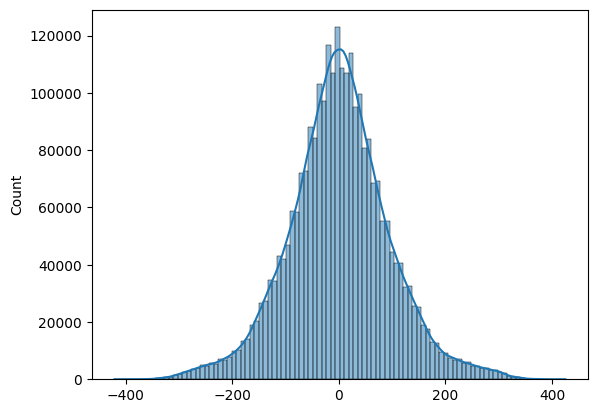

In [29]:
import seaborn as sns
sns.histplot(reshaped.flatten(), bins=100, kde=True)